# <center>Essence of Resume Screening :


---


It is the process of determining whether a candidate is qualified for a role based his or her education, experience, and other information captured on their resume.







*   It is a crucial yet challenging part of the hiring process.

*  On average, a recruiter spends 23 hours screening resumes for a single hire.

*   Even with automated processes, it is still the most time-consuming part of recruiting.
*   Save your time (Having a defined process will) :- Make the process more efficient and more accurate Find unqualified applicants quickly Result in a shortlist of candidates to interview who are aligned to the qualifications you’re looking for


*   This process will help you achieve your goal, to hire the most qualified and best-fitting applicant for the position.


---

# <center>Problem Statement.....

---



---


Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates.

Hiring the right talent is a challenge for all businesses. This challenge is magnified by the high volume of applicants if the business is labor-intensive, growing, and facing high attrition rates.

IT departments are short of growing markets. In a typical service organization, professionals with a variety of technical skills and business domain expertise are hired and assigned to projects to resolve customer issues. This task of selecting the best talent among many others is known as Resume Screening.

Typically, large companies do not have enough time to open each CV, so they use machine learning algorithms for the Resume Screening task


#Approach

---



---



1.   Load the data and load all the libraries
2.   Data Preparation and Data transformation
     1. Convert all text into LowerCase
     2. Remove all special characters
     3. Remove stop words
     4. Lemmatization and Stemming
3.   Vectorization
     1. TFIDF Vectorizer
4.   Machine Learning and also Deep Learning


---

In [ ]:
!pip install wordcloud

# Loading the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report

import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

# Load the dataset

https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset

In [ ]:
#loading the data
df=pd.read_csv("/content/UpdatedResumeDataSet.csv")

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.Resume[0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [ ]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [ ]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

# Visualization

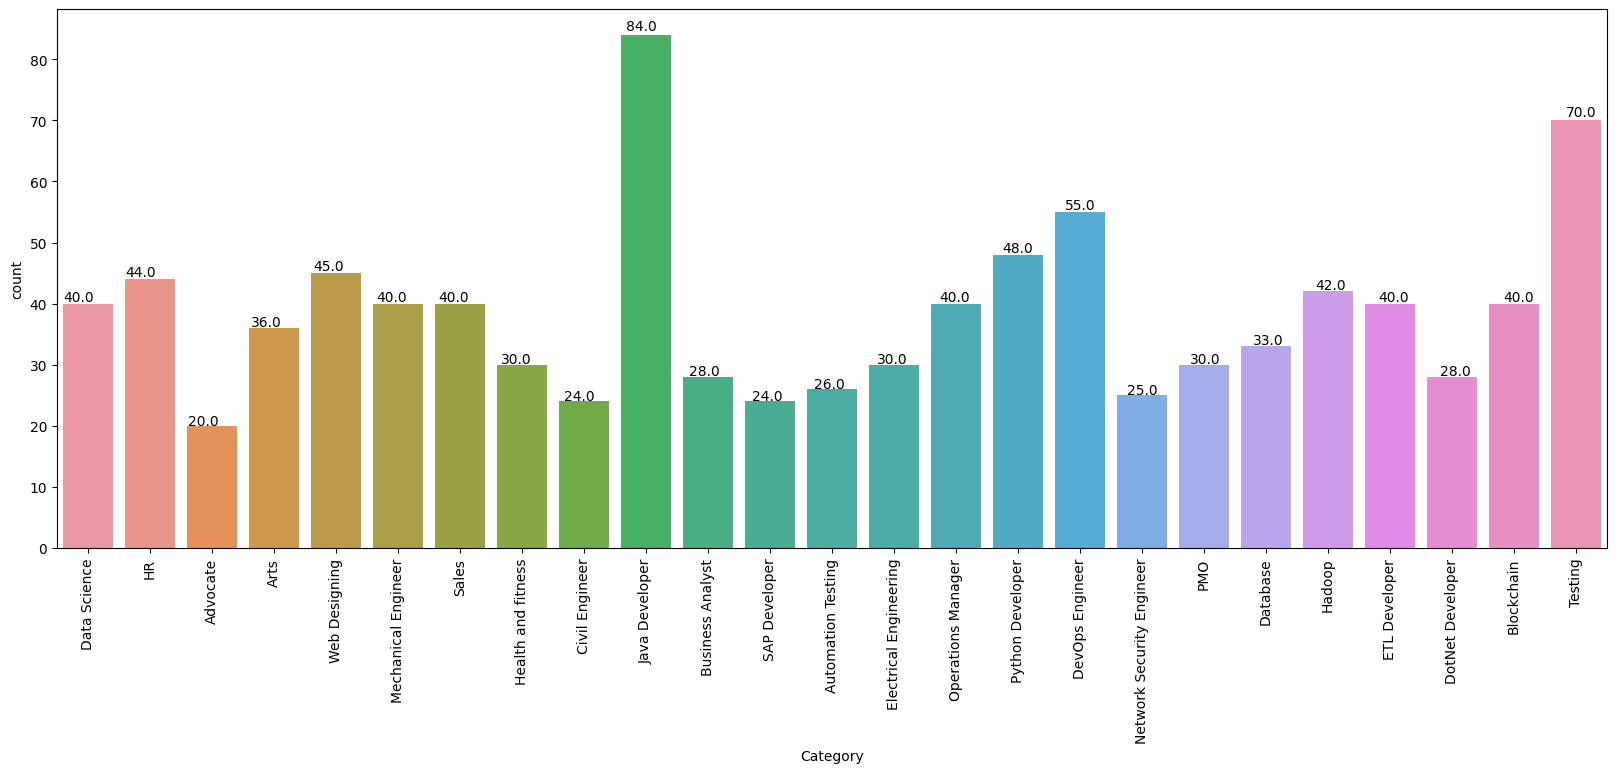

In [ ]:
plt.figure(figsize=(20,7))
pt=sns.countplot(x='Category',data=df)
plt.xticks(rotation=90)
for p in pt.patches:
    pt.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

# Cleaning the text

In [ ]:

import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')
def preprocess(sentence):
    sentence=str(sentence)
    #converting to lower case
    sentence = sentence.lower()
    #converting html to blank space
    sentence=sentence.replace('{html}',"")
    #removing the html or xml tags
    cleanr = re.compile('<.*?>')
    #removing the blank space
    cleantext = re.sub(cleanr, '', sentence)
    #removing the url links
    rem_url=re.sub(r'http\S+', '',cleantext)
    #removing the numbers
    rem_num = re.sub('[0-9]+', '', rem_url)
    #removing the RT and CC
    rem_RT = re.sub('RT|cc', ' ', rem_num)
    #removing the hachtags
    rem_hash = re.sub('#\S+', '', rem_RT)
    #removing the unwanted text
    rem_x = re.sub(r'[^\x00-\x7f]',r' ', rem_hash)
    #removing the punctuations
    rem_pun = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', rem_x)
    #tokenizing the data
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_pun)
    #removing the stopwords
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    #stemming the data
    stem_words=[stemmer.stem(w) for w in filtered_words]
    #lemmatizing the data
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]

    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#preprocessing the data
df['cleaned_resume']=df['Resume'].map(lambda s:preprocess(s))

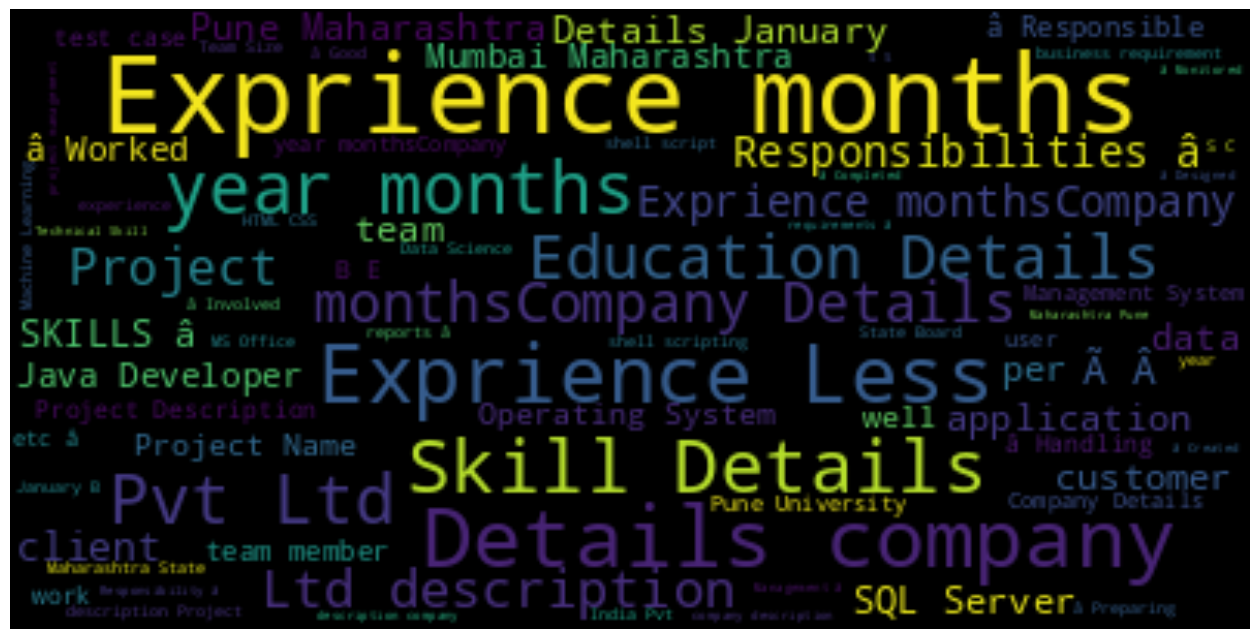

In [ ]:
wc = WordCloud().generate((' '.join(df.Resume)))
plt.figure(figsize=(16,16))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,skills programming languages python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,education details may may uit rgpv data scient...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",areas interest deep learning control system de...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skills python sap hana tableau sap hana sql sa...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",education details mca ymcaust faridabad haryan...


# Encoding the Data

In [ ]:
#using label encoder
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

# Splitting The Data

In [ ]:
x= df['cleaned_resume'].values
y= df['Category'].values

#vectorization using TfidfVectorizer
word_vectorizer = TfidfVectorizer(sublinear_tf=True,stop_words='english')
#fit the data
word_vectorizer.fit(x)
#transform the data
WordFeatures = word_vectorizer.transform(x)


# Train test split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(WordFeatures,y,random_state=1, test_size=0.2,shuffle=True, stratify=y)
print(x_train.shape)
print(x_test.shape)

(769, 6835)
(193, 6835)


# Training the Models

In [ ]:
knn=KNeighborsClassifier(n_neighbors=10)
svc=SVC()
rf=RandomForestClassifier()
dc=DecisionTreeClassifier()
bayes=MultinomialNB()

model=[knn,svc,rf,dc,bayes]
print("............................................")
for i in model:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(i)
  print(classification_report(y_test,y_pred))
  print('')
  print("score=",accuracy_score(y_test,y_pred))
  print("............................................")

............................................
KNeighborsClassifier(n_neighbors=10)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.83      0.71      0.77         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      0.88      0.93         8
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       0.86      1.00      0.92         6
          10       0.89      1.00      0.94         8
          11       1.00      1.00      1.00         6
          12       1.00      0.78      0.88         9
          13       1.00      1.00      1.00         8
          14       1.00      0.83      0.91         6
          15       0.94      1.00      0.97        17

#Conclusion:::
here after applying the models we can see that

MultinomialNB= 0.9430051813471503

DecisionTreeClassifier= 0.9948186528497409

RandomForestClassifier= 0.9948186528497409

SVC= 0.9948186528497409

KNeighborsClassifier= 0.9585492227979274

# Trying using RandomizedSearchCV for higher accuracy

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#assigning the parameters
random_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],

               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [ ]:
rf=RandomForestClassifier()
clf=RandomizedSearchCV(estimator=rf ,param_distributions=random_grid,verbose=2,random_state=142)


In [ ]:
#fit the model
search=clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   0.5s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   0.5s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   0.5s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   0.6s
[CV] END criterion=gini, max_depth=50, min_samples_leaf=2, min_samples_split=2, n_estimators=130; total time=   0.6s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.7s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   0.7s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=  

In [ ]:
#looking for parameters
search.best_params_

{'n_estimators': 230,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 110,
 'criterion': 'gini'}

In [ ]:
# best score
search.best_score_

0.9948051948051948

In [ ]:
# applying in random forest
rf = RandomForestClassifier(n_estimators=130,
 min_samples_split=2,
 min_samples_leaf = 2,
 max_depth= 50,

 criterion= 'gini')

In [ ]:
#fit the model
rf.fit(x_train.toarray(),y_train)
rf_preds_train = rf.predict(x_train.toarray())
rf_preds_test = rf.predict(x_test.toarray())

In [ ]:
#printing the accuracy
print('Accuracy score for train data : ', round(accuracy_score(y_train, rf_preds_train),2))
print('Accuracy score for test data : ', round(accuracy_score(y_test, rf_preds_test), ))


Accuracy score for train data :  1.0
Accuracy score for test data :  0.99


#Conclusion :::
here we can see that after using randamized cv the accuracy has improved a bit

Accuracy score for train data :  1.0

Accuracy score for test data :  0.99

In [ ]:
#looking at the classes
le.classes_

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

In [ ]:
import pickle

In [ ]:
%pip install typing-extensions --upgrade

In [ ]:
#dumping pickle files
pickle.dump(WordFeatures,open('WordFeatures.pkl','wb'))
pickle.dump(rf, open('rf.pkl', 'wb'))

In [ ]:
#sample resume
myresume = """KEY SKILLS: â\x80¢ Computerized accounting with tally â\x80¢ Sincere & hard working â\x80¢ Management accounting & income tax â\x80¢ Good communication & leadership â\x80¢ Two and four wheeler driving license â\x80¢ Internet & Ecommerce management COMPUTER SKILLS: â\x80¢ C Language â\x80¢ Web programing â\x80¢ Tally â\x80¢ Dbms Education Details \r\nJune 2017 to June 2019 Mba Finance/hr India Mlrit\r\nJune 2014 to June 2017 Bcom Computer Hyderabad, Telangana Osmania university\r\nJune 2012 to April 2014 Inter MEC India Srimedhav\r\nHr \r\n\r\nNani\r\nSkill Details \r\naccounting- Exprience - 6 months\r\nDATABASE MANAGEMENT SYSTEM- Exprience - 6 months\r\nDbms- Exprience - 6 months\r\nManagement accounting- Exprience - 6 months\r\nEcommerce- Exprience - 6 monthsCompany Details \r\ncompany - Valuelabs\r\ndescription - They will give the RRF form the required DLT then the hand over to RLT then scrum master will take the form from the RLT then scrum master will give the forms to trainee which we can work on the requirement till the candidate receive the offer from the company
"""

In [ ]:
import pickle

# Load the trained classifier
clf = pickle.load(open('rf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = preprocess(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = word_vectorizer.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: HR
12


In [ ]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
#ex
df["Resume"][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [ ]:
#ex
df["Resume"][58]

'KEY SKILLS: â\x80¢ Computerized accounting with tally â\x80¢ Sincere & hard working â\x80¢ Management accounting & income tax â\x80¢ Good communication & leadership â\x80¢ Two and four wheeler driving license â\x80¢ Internet & Ecommerce management COMPUTER SKILLS: â\x80¢ C Language â\x80¢ Web programing â\x80¢ Tally â\x80¢ Dbms Education Details \r\nJune 2017 to June 2019 Mba Finance/hr India Mlrit\r\nJune 2014 to June 2017 Bcom Computer Hyderabad, Telangana Osmania university\r\nJune 2012 to April 2014 Inter MEC India Srimedhav\r\nHr \r\n\r\nNani\r\nSkill Details \r\naccounting- Exprience - 6 months\r\nDATABASE MANAGEMENT SYSTEM- Exprience - 6 months\r\nDbms- Exprience - 6 months\r\nManagement accounting- Exprience - 6 months\r\nEcommerce- Exprience - 6 monthsCompany Details \r\ncompany - Valuelabs\r\ndescription - They will give the RRF form the required DLT then the hand over to RLT then scrum master will take the form from the RLT then scrum master will give the forms to trainee w

In [ ]:
#ex
df["Resume"][45]

'Education Details \r\n BBA   lovely professional university\r\nHR \r\n\r\n\r\nSkill Details \r\nCommunication- Exprience - 6 monthsCompany Details \r\ncompany - \r\ndescription - '

In [ ]:
#predicting using job description
job_description = "Data Science"
if job_description == category_name:
  print("selected")
else :
  print("sorry,You are not selected")

sorry,You are not selected


In [ ]:
pip install --upgrade pip

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
def transform(input_text):
    #preprocessing the data using nlp
    transformed_input = preprocess(input_text)
    #vectorizing the data
    vectorized_input = word_vectorizer.transform([transformed_input])
    #result will be predicted probability
    result = rf.predict_proba(vectorized_input)[0]
    return {
    "Java Developer":float(result[15]),
     "Testing":float(result[23]),
     "DevOps Engineer":float(result[8]),
     "Python Developer":float(result[20]),
     "Web Designing":float(result[24]),
     "HR":float(result[12]),
     "Hadoop":float(result[13]),
     "Blockchain":float(result[3]),
     "ETL Developer":float(result[10]),
     "Operations Manager":float(result[18]),
     "Data Science":float(result[6]),
     "Sales":float(result[22]),
     "Mechanical Engineer":float(result[16]),
     "Arts":float(result[1]),
     "Database":float(result[7]),
     "Electrical Engineering":float(result[11]),
     "Health and fitness":float(result[14]),
     "PMO":float(result[19]),
     "Business Analyst":float(result[4]),
     "DotNet Developer":float(result[9]),
     "Automation Testing":float(result[2]),
     "Network Security Engineer":float(result[17]),
     "SAP Developer":float(result[21]),
     "Civil Engineer":float(result[5]),
     "Advocate":float(result[0])}

# Define the Gradio interface
demo = gr.Interface(
    fn=transform,
    inputs=gr.Textbox(),gr.inputs.File(label="upload file")
    outputs='label'
)

# Launch the interface
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://244d6b926d965283b0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


#<center> Using BERT transformer

In [ ]:
%pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.1/123.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 20.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.18.0
    Uninstalling huggingface-hub-0.18.0:
      Successfully uninstalled huggingface-hub-0.18.0


In [ ]:
%pip install tensorflow

# import the libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import to_categorical
from transformers import AutoTokenizer, TFDistilBertForSequenceClassification
from tensorflow.keras.layers import Dense, Dropout, Input, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# read the data

In [ ]:
df=pd.read_csv("/content/UpdatedResumeDataSet.csv")

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
# nltk.download('stopwords')
# lemmatizer = WordNetLemmatizer()
# stemmer = PorterStemmer()
# nltk.download('wordnet')
# def preprocess(sentence):
#     sentence=str(sentence)
#     sentence = sentence.lower()
#     sentence=sentence.replace('{html}',"")
#     cleanr = re.compile('<.*?>')
#     cleantext = re.sub(cleanr, '', sentence)
#     rem_url=re.sub(r'http\S+', '',cleantext)
#     rem_num = re.sub('[0-9]+', '', rem_url)
#     rem_RT = re.sub('RT|cc', ' ', rem_num)
#     rem_hash = re.sub('#\S+', '', rem_RT)
#     rem_x = re.sub(r'[^\x00-\x7f]',r' ', rem_hash)
#     rem_pun = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', rem_x)
#     filtered_words = [w for w in rem_pun if len(w) > 2 if not w in stopwords.words('english')]
#     stem_words=[stemmer.stem(w) for w in filtered_words]
#     lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
#     return " ".join(filtered_words)

In [ ]:
#df['cleaned_resume']=df['Resume'].map(lambda s:preprocess(s))

In [ ]:
labels_dict = {}

for idx, label in enumerate(df.Category.unique()):
    labels_dict[label] = idx

labels_dict

{'Data Science': 0,
 'HR': 1,
 'Advocate': 2,
 'Arts': 3,
 'Web Designing': 4,
 'Mechanical Engineer': 5,
 'Sales': 6,
 'Health and fitness': 7,
 'Civil Engineer': 8,
 'Java Developer': 9,
 'Business Analyst': 10,
 'SAP Developer': 11,
 'Automation Testing': 12,
 'Electrical Engineering': 13,
 'Operations Manager': 14,
 'Python Developer': 15,
 'DevOps Engineer': 16,
 'Network Security Engineer': 17,
 'PMO': 18,
 'Database': 19,
 'Hadoop': 20,
 'ETL Developer': 21,
 'DotNet Developer': 22,
 'Blockchain': 23,
 'Testing': 24}

In [ ]:
df.Category = df.Category.apply(func=lambda x: labels_dict[x])
df.Category = df.Category.astype(np.int64)

#preprocess the data

In [ ]:
import re
def cleanResume(txt):
    #removing html link
    cleanText = re.sub('http\S+\s', ' ', txt)
    #removing RT and CC
    cleanText = re.sub('RT|cc', ' ', cleanText)
    #rrmoving hashtags
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    #removing @ and empty spaces
    cleanText = re.sub('@\S+', '  ', cleanText)
    #removing punctuations
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    #removing un wanted data
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [ ]:
#preprocessing the data
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [ ]:
df.head()

,Category,Resume
0,0,Skills Programming Languages Python pandas num...
1,0,Education Details May 2013 to May 2017 B E UIT...
2,0,Areas of Interest Deep Learning Control System...
3,0,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,0,Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
pip install torch

In [ ]:
#using pretrained tokenizer from hugging face
tokenizer = AutoTokenizer.from_pretrained("manishiitg/distilbert-resume-parts-classify")
#using BERT model transformer
bert_model = TFDistilBertForSequenceClassification.from_pretrained("manishiitg/distilbert-resume-parts-classify",from_pt=True)

(…)ssify/resolve/main/tokenizer_config.json:   0%|          | 0.00/258 [00:00<?, ?B/s]

(…)-parts-classify/resolve/main/config.json:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

(…)me-parts-classify/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)ify/resolve/main/special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [ ]:

train_df, test_df = train_test_split(df,test_size=0.3,shuffle=True,random_state=101)

In [ ]:
#selecting the size to be trained
max_resume_len = 200

#  tokenization the data

In [ ]:
X_train = tokenizer(text=train_df.Resume.tolist (),
                   add_special_tokens=True,
                   padding=True,
                   truncation=True,
                   max_length=max_resume_len,
                   return_tensors='tf',
                   return_attention_mask=True,
                   return_token_type_ids=False,
                   verbose=1)

X_test = tokenizer(text=test_df.Resume.tolist(),
                  add_special_tokens=True,
                  padding=True,
                  truncation=True,
                  max_length=max_resume_len,
                  return_tensors='tf',
                  return_attention_mask=True,
                  return_token_type_ids=False,
                  verbose=1)

# Defining the model architecture

In [ ]:
input_ids = Input(shape=(max_resume_len,),dtype=tf.int32,name='input_ids')
attention_masks = Input(shape=(max_resume_len,),dtype=tf.int32,name='attention_mask')

In [ ]:
word_embeddings = bert_model(input_ids,attention_mask=attention_masks)[0] # 0 --> final hidden state, 1 --> pooling output

output = Flatten()(word_embeddings)
output = Dense(units=1024,activation='relu')(output)
output = BatchNormalization()(output)
output = Dropout(0.25)(output)
output = Dense(units=512,activation='relu')(output)
output = Dropout(0.25)(output)
output = Dense(units=256,activation='relu')(output)
output = BatchNormalization()(output)
output = Dropout(0.25)(output)
output = Dense(units=128,activation='relu')(output)
output = Dropout(0.25)(output)
output = Dense(units=64,activation='relu')(output)
output = Dense(units=25,activation='softmax')(output)

model = Model(inputs=[input_ids,attention_masks],outputs=output)
model.layers

In [ ]:
model.layers[2].trainable = True

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 200)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 200)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_distil_bert_for_sequenc  TFSequenceClassifierOutput   6696270   ['input_ids[0][0]',           
 e_classification (TFDistil  (loss=None, logits=(None,    0          'attention_mask[0][0]']      
 BertForSequenceClassificat  12),                                                             

#model compilation

In [ ]:
adam = Adam(learning_rate=5e-5,
           epsilon=2e-8,

           clipnorm=1.0)

model.compile(loss='sparse_categorical_crossentropy',optimizer=adam,metrics=SparseCategoricalAccuracy('balanced_accuracy'))


In [ ]:
es = EarlyStopping(monitor='val_balanced_accuracy',patience=250,verbose=1,mode='max',restore_best_weights=True)
mc = ModelCheckpoint('resume_parser.h5',monitor='val_balanced_accuracy',mode='max',verbose=1,save_best_only=True)

r = model.fit(x={'input_ids': X_train['input_ids'], 'attention_mask': X_train['attention_mask']},
             y=train_df.Category,
             epochs=100,
             batch_size=32,
             callbacks=[es,mc],
             validation_data=({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']},test_df.Category))

Epoch 1/100
22/22 [==============================] - ETA: 0s - loss: 3.5277 - balanced_accuracy: 0.0609
Epoch 1: val_balanced_accuracy improved from -inf to 0.03460, saving model to resume_parser.h5
22/22 [==============================] - 29s 1s/step - loss: 3.5277 - balanced_accuracy: 0.0609 - val_loss: 3.2119 - val_balanced_accuracy: 0.0346
Epoch 2/100
22/22 [==============================] - ETA: 0s - loss: 3.3448 - balanced_accuracy: 0.0624
Epoch 2: val_balanced_accuracy improved from 0.03460 to 0.08651, saving model to resume_parser.h5
22/22 [==============================] - 21s 988ms/step - loss: 3.3448 - balanced_accuracy: 0.0624 - val_loss: 3.2000 - val_balanced_accuracy: 0.0865
Epoch 3/100
22/22 [==============================] - ETA: 0s - loss: 3.2217 - balanced_accuracy: 0.0892
Epoch 3: val_balanced_accuracy improved from 0.08651 to 0.10381, saving model to resume_parser.h5
22/22 [==============================] - 22s 1s/step - loss: 3.2217 - balanced_accuracy: 0.0892 - va

# Train and Test loss

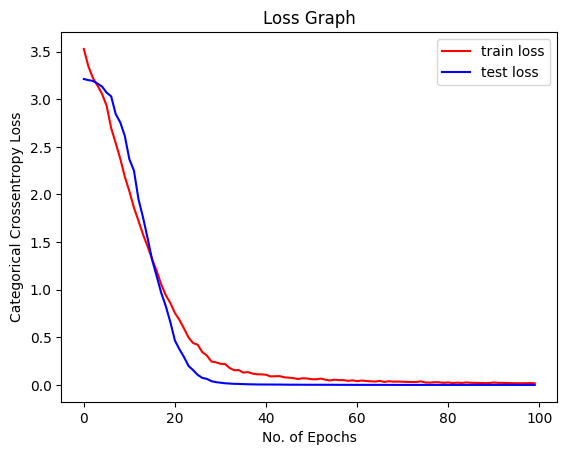

In [ ]:
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='test loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Categorical Crossentropy Loss')
plt.title('Loss Graph')
plt.legend();

# Train and Test accuracy

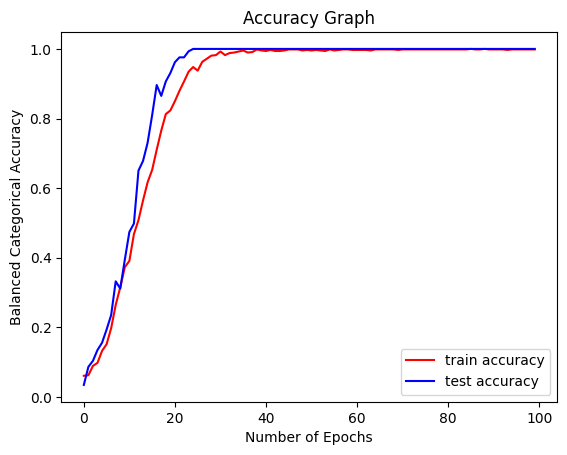

In [ ]:
plt.plot(r.history['balanced_accuracy'],'r',label='train accuracy')
plt.plot(r.history['val_balanced_accuracy'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Balanced Categorical Accuracy')
plt.title('Accuracy Graph')
plt.legend();

In [ ]:
loss, acc = model.evaluate({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']},test_df.Category)
print("Test Sparse Categorical Crossentropy Loss:", loss)
print("Test Balanced Categorical Accuracy:", acc)


10/10 [==============================] - 2s 182ms/step - loss: 1.3935e-04 - balanced_accuracy: 1.0000
Test Sparse Categorical Crossentropy Loss: 0.00013935106107965112
Test Balanced Categorical Accuracy: 1.0


#Conclusion::
here using bert transformer we can see that we get 100 percent aaccuracy on test

In [ ]:
%pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 106.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.1 MB/s eta 0:00:00


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 1.624s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
import streamlit as st
import pickle
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')

#loading models
clf = pickle.load(open('WordFeatures.pkl','rb'))
tfidfd = pickle.load(open('rf.pkl','rb'))

def clean_resume(resume_text):
    clean_text = re.sub('http\S+\s*', ' ', resume_text)
    clean_text = re.sub('RT|cc', ' ', clean_text)
    clean_text = re.sub('#\S+', '', clean_text)
    clean_text = re.sub('@\S+', '  ', clean_text)
    clean_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', clean_text)
    clean_text = re.sub(r'[^\x00-\x7f]', r' ', clean_text)
    clean_text = re.sub('\s+', ' ', clean_text)
    return clean_text
# web app
def main():
    st.title("Resume Screening App")
    uploaded_file = st.file_uploader('Upload Resume', type=['txt','pdf'])

    if uploaded_file is not None:
        try:
            resume_bytes = uploaded_file.read()
            resume_text = resume_bytes.decode('utf-8')
        except UnicodeDecodeError:
            # If UTF-8 decoding fails, try decoding with 'latin-1'
            resume_text = resume_bytes.decode('latin-1')

        cleaned_resume = clean_resume(resume_text)
        input_features = tfidfd.transform([cleaned_resume])
        prediction_id = clf.predict(input_features)[0]
        st.write(prediction_id)

        # Map category ID to category name
        category_mapping = {
            15: "Java Developer",
            23: "Testing",
            8: "DevOps Engineer",
            20: "Python Developer",
            24: "Web Designing",
            12: "HR",
            13: "Hadoop",
            3: "Blockchain",
            10: "ETL Developer",
            18: "Operations Manager",
            6: "Data Science",
            22: "Sales",
            16: "Mechanical Engineer",
            1: "Arts",
            7: "Database",
            11: "Electrical Engineering",
            14: "Health and fitness",
            19: "PMO",
            4: "Business Analyst",
            9: "DotNet Developer",
            2: "Automation Testing",
            17: "Network Security Engineer",
            21: "SAP Developer",
            5: "Civil Engineer",
            0: "Advocate",
        }

        category_name = category_mapping.get(prediction_id, "Unknown")

        st.write("Predicted Category:", category_name)



# python main
if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2023-11-06 07:11:24.641 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [ ]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py & curl ipv4.icanhazip.com & /content/app.py &>/content/logs.txt

34.125.213.38



  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.213.38:8501

  Stopping...


In [ ]:
!npx localtunnel --port 8501